# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#! pip install matplotlib
#! pip install scipy
#! pip install response


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#perform API calls to check the weather of each city in our list


#OpenWeather Key

units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=e1c264e97c2d34a3be608ce956ffed68&units=imperial&q=


In [5]:
#Create a dataframe to store the data
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print (city)
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | najran
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | guozhen
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | beloha
Processing Record 8 of Set 1 | geraldton
grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | shieli
saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | tuktoyaktuk
karkaralinsk
City not found. Skipping...
Processing Record 12 of Set 1 | inta
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | tezu
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | sorland
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | tautira
Processing Record 22 of Set 1 | ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#convert to raw df

weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}


weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,najran,0,SA,1615661398,19,17.4924,44.1277,78.80,6.91
1,luderitz,0,NA,1615661399,78,-26.6481,15.1594,68.14,13.91
2,guozhen,0,CN,1615661399,85,34.3659,107.3590,52.57,2.86
3,rikitea,46,PF,1615661400,75,-23.1203,-134.9692,79.95,5.91
4,punta arenas,20,CL,1615661400,43,-53.1500,-70.9167,51.80,28.77
5,ancud,0,CL,1615661401,63,-41.8697,-73.8203,70.00,8.05
6,beloha,15,MG,1615661401,79,-25.1667,45.0500,75.52,18.75
7,geraldton,0,AU,1615661402,33,-28.7667,114.6000,73.40,23.02
8,albany,0,US,1615661234,25,42.6001,-73.9662,41.00,1.01
9,shieli,100,KZ,1615661404,84,44.1667,66.7500,23.25,18.50


In [7]:
# Exporting to CSV

weather_dataframe.to_csv("weather_df.csv")

# Checking New DataFrame & Cleaning the Data

weather_data = pd.read_csv("weather_df.csv")
weather_df2 = weather_data.drop(columns=["Unnamed: 0"])
weather_df2.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,najran,0,SA,1615661398,19,17.4924,44.1277,78.80,6.91
1,luderitz,0,NaN,1615661399,78,-26.6481,15.1594,68.14,13.91
2,guozhen,0,CN,1615661399,85,34.3659,107.3590,52.57,2.86
3,rikitea,46,PF,1615661400,75,-23.1203,-134.9692,79.95,5.91
4,punta arenas,20,CL,1615661400,43,-53.1500,-70.9167,51.80,28.77
5,ancud,0,CL,1615661401,63,-41.8697,-73.8203,70.00,8.05
6,beloha,15,MG,1615661401,79,-25.1667,45.0500,75.52,18.75
7,geraldton,0,AU,1615661402,33,-28.7667,114.6000,73.40,23.02
8,albany,0,US,1615661234,25,42.6001,-73.9662,41.00,1.01
9,shieli,100,KZ,1615661404,84,44.1667,66.7500,23.25,18.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

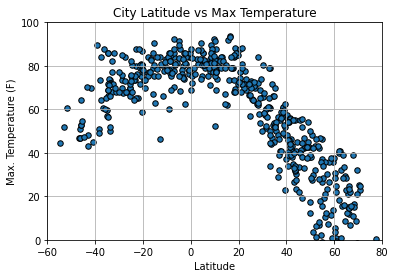

In [10]:
 #temp vs latitude scatterplot, format time

plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

##This graph shows that as you move closer to the equator the the maximum temperature increases and reduces as you move further away from the equator.

## Latitude vs. Humidity Plot

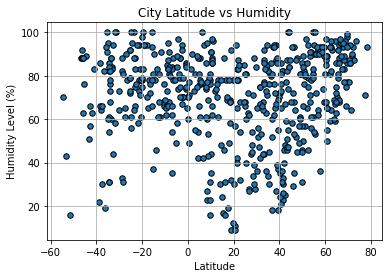

In [11]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

##There is high variation in the humidity trend but we can interprete that the humidity is high within -5 and 5 degrees of latitude

## Latitude vs. Cloudiness Plot

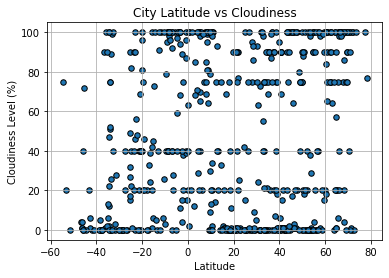

In [12]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

##There does not seem to be a clear relationship between the latitude and cloudiness

## Latitude vs. Wind Speed Plot

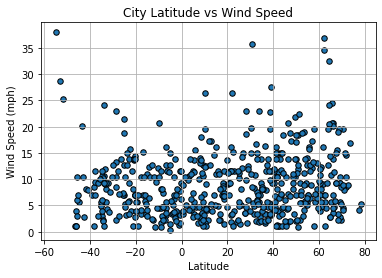

In [13]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

##There does not seem to be a trend in city latitude and wind speed

## Linear Regression

In [14]:
 #linear regression by hemisphere

# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,luderitz,0,NA,1615661399,78,-26.6481,15.1594,68.14,13.91
3,rikitea,46,PF,1615661400,75,-23.1203,-134.9692,79.95,5.91
4,punta arenas,20,CL,1615661400,43,-53.1500,-70.9167,51.80,28.77
5,ancud,0,CL,1615661401,63,-41.8697,-73.8203,70.00,8.05
6,beloha,15,MG,1615661401,79,-25.1667,45.0500,75.52,18.75


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

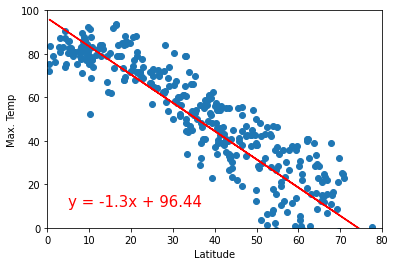

In [15]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

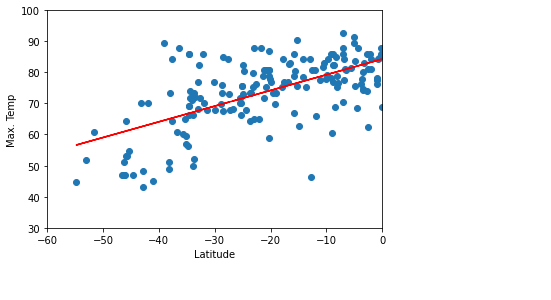

In [16]:

#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LAT.png")

##Based on the two regression trends being opposite, it stands true that the temperature rises as you get closer to the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

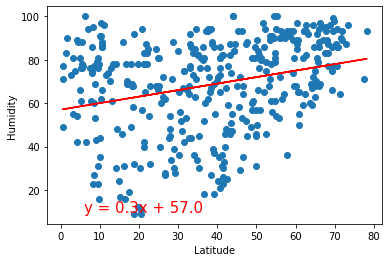

In [17]:

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

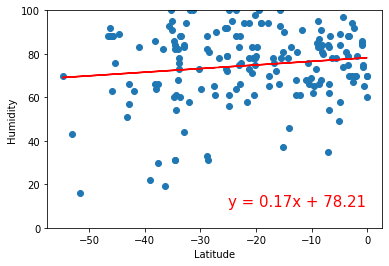

In [18]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUM VS LAT.png")

##There is a lot of scatter but it seems that in the southern hemi the humidity increases as you get closer to the equator
##The humidity decreases at lower atlitudes in the northn hemi


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

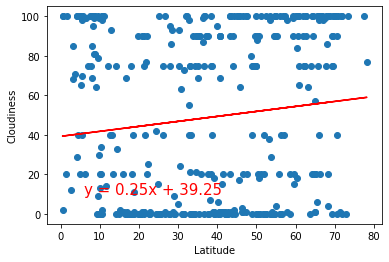

In [19]:

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

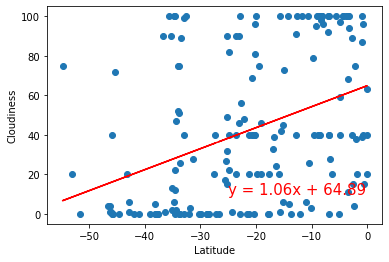

In [20]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH CLOUD VS LAT.png")

## There seems to be a lot of scatter to find a trend

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

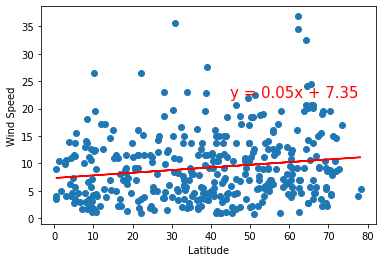

In [24]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

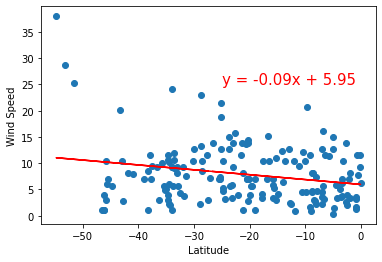

In [23]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH WIND VS LAT.png")

## Wind speed tends to be less than 10 mph except for extreme altitudes.